# Import model & Necessary Libraries

In [1]:
import sys
sys.path.append('..')

In [2]:
from neural_network.NeuralNetworkBP import NeuralNetworkBP
from sklearn.neural_network import MLPRegressor

# Generate some data

In [3]:
# Generate some data
import numpy as np
import matplotlib.pyplot as plt

import numpy as np

# generate random data
X = np.random.rand(1000, 10)
y = np.random.randint(0, 1, (1000, 1))

# Evaluation of model training time

In [6]:
import time
import matplotlib.pyplot as plt


hidden_layer_sizes = [i for i in range(1, 1000, 5)]
times = []

for hidden_size in hidden_layer_sizes:
    start = time.time()
    nn = NeuralNetworkBP(input_size=10, hidden_size=hidden_size, output_size=1)
    nn.train(X, y, epochs=10, learning_rate=0.01)
    end = time.time()
    times.append(end - start)



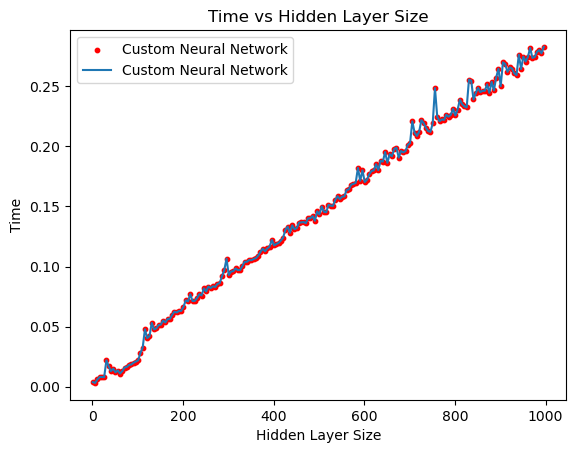

In [7]:
plt.figure()
plt.xlabel('Hidden Layer Size')
plt.ylabel('Time')
plt.title('Time vs Hidden Layer Size')


plt.scatter(hidden_layer_sizes, times, label='Custom Neural Network', color='red', s=10), 
plt.plot(hidden_layer_sizes, times, label='Custom Neural Network')

plt.legend()
plt.show()

In [47]:
# generate random data
X = np.random.rand(100, 10)
y = np.random.randint(0, 2, (100, 1))


# Initialize the Neural Network
nn = NeuralNetworkBP(input_size=10, hidden_size=200, output_size=1)

# Train the Neural Network
nn.train(X, y, epochs=1000, learning_rate=0.1)

# Test the Neural Network
output = nn.forward(X)
print("Predictions:")
print(output)

Epoch 0, Loss: 0.40657272291692975
Epoch 100, Loss: 0.439117133505775
Epoch 200, Loss: 0.33630628770598897
Epoch 300, Loss: 0.4439383851504493
Epoch 400, Loss: 0.28606663432959467
Epoch 500, Loss: 0.2601168434337299
Epoch 600, Loss: 0.2483604950466111
Epoch 700, Loss: 0.2185263636393774
Epoch 800, Loss: 0.21909889290052786
Epoch 900, Loss: 0.20118941108157934
Predictions:
[[3.36720098e-01]
 [9.99888256e-01]
 [7.98796096e-06]
 [7.26069524e-08]
 [6.44552221e-10]
 [6.05098178e-02]
 [5.80121653e-04]
 [2.66999005e-01]
 [1.61715267e-01]
 [8.21708467e-01]
 [5.21272251e-01]
 [8.24913137e-07]
 [8.75004645e-01]
 [3.04106179e-07]
 [5.04727659e-01]
 [2.43810385e-06]
 [8.10100438e-01]
 [3.69233546e-01]
 [1.48197661e-04]
 [6.19321237e-10]
 [1.19044164e-03]
 [7.18041559e-01]
 [3.85222196e-02]
 [2.95747958e-07]
 [5.64766330e-01]
 [1.14769166e-01]
 [8.82082267e-05]
 [1.28336070e-03]
 [2.79683390e-01]
 [4.29661201e-01]
 [3.33552620e-06]
 [4.00595981e-05]
 [8.38950046e-01]
 [3.61533360e-13]
 [3.03546557e

In [64]:
import numpy as np

# Activation function: Sigmoid
def sigmoid(x):
    print(x)
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Mean Squared Error Loss Function
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Neural Network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.bias_output = np.zeros((1, self.output_size))

    def forward(self, X):
        # Forward pass
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)
        
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = sigmoid(self.final_input)
        
        return self.final_output

    def backward(self, X, y, learning_rate):
        # Calculate the error
        loss = mse_loss(y, self.final_output)
        
        # Calculate gradients
        output_error = self.final_output - y
        output_delta = output_error * sigmoid_derivative(self.final_output)
        
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)
        
        # Update weights and biases
        self.weights_hidden_output -= self.hidden_output.T.dot(output_delta) * learning_rate
        self.bias_output -= np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        
        self.weights_input_hidden -= X.T.dot(hidden_delta) * learning_rate
        self.bias_hidden -= np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate
        
        return loss

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.forward(X)
            loss = self.backward(X, y, learning_rate)
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')

# Example usage
if __name__ == "__main__":
    # XOR problem
    # generate random data
    X = np.random.rand(10, 4)
    y = np.random.randint(0, 10, (10, 1))
    
    # Initialize the Neural Network
    nn = NeuralNetwork(input_size=4, hidden_size=2, output_size=1)
    
    # Train the Neural Network
    nn.train(X, y, epochs=1, learning_rate=1000)
    
    # Test the Neural Network
    output = nn.forward(X)
    print("Predictions:")
    print(output)


[[ 0.97213252 -0.06365744]
 [ 1.00377917 -0.30975464]
 [ 0.53479382  0.12025067]
 [ 0.84034629  0.08083922]
 [-0.35478433  0.21396848]
 [ 0.36085535  0.08744068]
 [ 1.2120683   0.60938129]
 [-0.61242185  0.14105036]
 [ 0.70401415  0.18729322]
 [ 1.70584213  0.3498114 ]]
[[-1.22985289]
 [-1.18354188]
 [-1.16447459]
 [-1.23140446]
 [-0.9420545 ]
 [-1.11135129]
 [-1.42316057]
 [-0.85874584]
 [-1.22181556]
 [-1.45369832]]
Epoch 0, Loss: 34.52883671138331
[[-3224.96587361 -3183.17854286]
 [-4115.70736112 -4051.15650595]
 [-3211.11758408 -3158.98242427]
 [-4472.43000689 -4395.12072308]
 [-3527.38534318 -3431.73317004]
 [-4128.84510266 -4050.77878095]
 [-4803.45094481 -4740.60026046]
 [-3338.75028385 -3232.94563477]
 [-3956.89464629 -3892.23025353]
 [-4060.00783387 -4033.85271197]]
[[8562.6843183]
 [8562.6843183]
 [8562.6843183]
 [8562.6843183]
 [8562.6843183]
 [8562.6843183]
 [8562.6843183]
 [8562.6843183]
 [8562.6843183]
 [8562.6843183]]
Predictions:
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

C:\Users\mahmo\AppData\Local\Temp\ipykernel_23772\104673295.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [68]:
import numpy as np

# Activation function: Sigmoid with clipping to prevent overflow
def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

# Derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Mean Squared Error Loss Function
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Neural Network class
class NeuralNetworkBP:
    def __init__(self, hidden_size, max_iter=1000, output_size=1, learning_rate=0.01):
        self.input_size = 0
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = max_iter

    def forward(self, X):
        # Forward pass
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)
        
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = sigmoid(self.final_input)
        
        return self.final_output

    def backward(self, X, y):
        # Calculate the error
        loss = mse_loss(y, self.final_output)
        
        # Calculate gradients
        output_error = self.final_output - y
        output_delta = output_error * sigmoid_derivative(self.final_output)
        
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)
        
        # Update weights and biases
        self.weights_hidden_output -= self.hidden_output.T.dot(output_delta) * self.learning_rate
        self.bias_output -= np.sum(output_delta, axis=0, keepdims=True) * self.learning_rate
        
        self.weights_input_hidden -= X.T.dot(hidden_delta) * self.learning_rate
        self.bias_hidden -= np.sum(hidden_delta, axis=0, keepdims=True) * self.learning_rate
        
        return loss

    def fit(self, X, y):
        self.input_size = X.shape[1]
        self.output_size = y.shape[1]

        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.bias_output = np.zeros((1, self.output_size))

        for epoch in range(self.epochs):
            output = self.forward(X)
            loss = self.backward(X, y)
            if epoch % 1 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')


# XOR problem
# generate random data
X = np.random.rand(10, 4)
y = np.random.randint(0, 10, (10, 1))

# Initialize the Neural Network
nn = NeuralNetwork(input_size=4, hidden_size=2, output_size=1)

# Train the Neural Network
nn.train(X, y, epochs=10, learning_rate=1000)

# Test the Neural Network
output = nn.forward(X)
print("Predictions:")
print(output)



Epoch 0, Loss: 33.22387554052513
Predictions:
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
